In [34]:
# https://iamtrask.github.io//2015/07/27/python-network-part2/
# Данная сеть предназначена для решения достаточно простой задачи
# использовать данные на входе для предсказания значения на выходе
# данная задача чуть посложнее, нет прямого совпадения 
# между входом и выходом
# Inputs 	Output
# 0 0 1 	0
# 0 1 1 	1
# 1 0 1 	1
# 1 1 1 	0
# для решения данной проблемы, 
# мы будем добавлятьдополнительный внутренний слой
#для построения графиков внутри notebook'a
%pylab inline 
import pylab as pl # библиотека для построения графиков
import numpy as np # библиотека для осуществления вычислений

Populating the interactive namespace from numpy and matplotlib


In [35]:
# альфа - коэффициент определяющий "скорость" обучения
alphas = [0.001,0.01,0.1,1,10,100,1000]

In [36]:
# sigmoid function - или функция активации нейронов
def sigmoid(x,deriv=False): 
    if(deriv==True): # если истина  - то нам нужна производная
        return x*(1-x) # возвращаем производную функции
    return 1/(1+np.exp(-x)) # возвращаем функцию

In [37]:
# для примера построим график функции
tmpX = np.arange(-5,5,0.1) 

In [38]:
tmpY = sigmoid(tmpX)

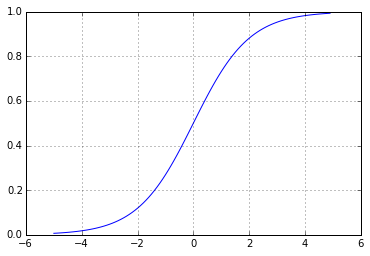

In [39]:
pl.plot(tmpX,tmpY)
plt.grid()

In [40]:
# Входные данные 3 входа и 4 примера
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
print(X)
print(X.shape)

[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
(4, 3)


In [41]:
# Выходные данные - 1 выход и 4 примера.
y = np.array([[0],
			[1],
			[1],
			[0]])
print(y)
print(y.shape)

[[0]
 [1]
 [1]
 [0]]
(4, 1)



Training With Alpha:0.001


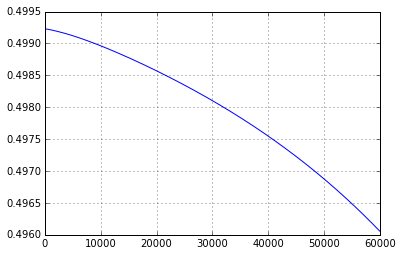


Training With Alpha:0.01


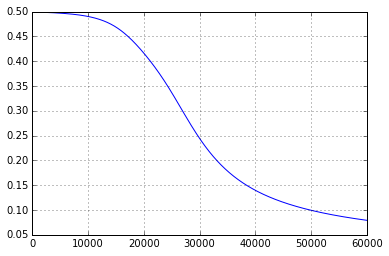


Training With Alpha:0.1


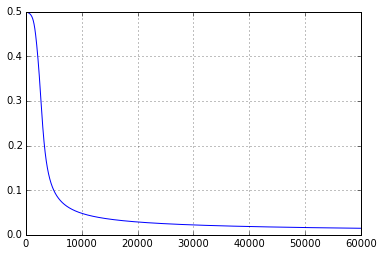


Training With Alpha:1


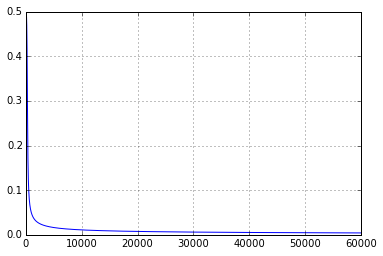


Training With Alpha:10


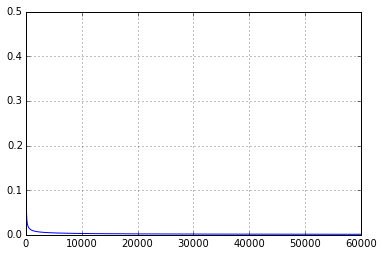


Training With Alpha:100


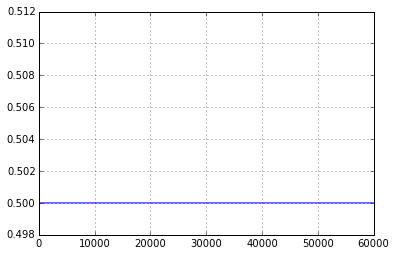


Training With Alpha:1000


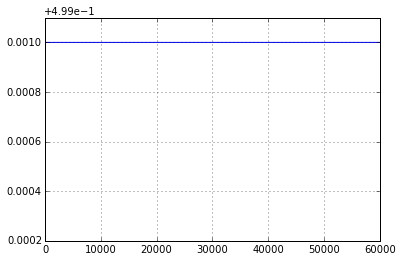

In [42]:
for alpha in alphas:
    
    np.random.seed(1)
     # генерируем "синапсы" - веса связи между нейронами
    # у нас 3 входа, внутренний слой состоит из 4х элеметнов
    # это внутренний слой - размер 4х1
    syn1 = 2*np.random.random((4,1)) - 1
    # а вот связей надо 3х4, чтобы создать полносвязную сеть
    syn0 = 2*np.random.random((3,4)) - 1
    
    errors=np.array([])
    numJ =np.array([])
    for j in range(60000):
        # forward propagation
        # Загружаем сразу все тренировочные примеры
        # на 0 - входной слой
        l0 = X
        # Умножаем вход на веса
        # это и есть попытка "предсказать значение" для внутреннего слоя
        # l0 - матрица 4x3 syn0 - 3x4
        # при перемножении - размерность в середине должна совпадать 4х3 * 3х4 = 4х4    
        l1 = sigmoid(np.dot(l0,syn0))
        # а теперь обучим слой 2 - выходной, подав на него значений нейронов слоя 
        # 4x4 - 4x1 = 4x1 - обучение для всех тренировочных примеров
        l2 = sigmoid(np.dot(l1,syn1))
        # сравниваем с ожидаемым результатом
        # и сохраняем ошибку (4x1)
        l2_error = l2 - y
        # формируем массив - номер обучения
        # и средняя ошибка и все веса
        # это для порсмотра режима обучения
        if (j%10==0):
            numJ=np.append(numJ,j)
            errors=np.append(errors,np.mean(np.abs(l2_error)))
            # print(syn0)

        # multiply how much we missed by the 
        # slope of the sigmoid at the values in l1
        # вычисляем разницу, но умножая ошибку 
        # на производную функции активации 
        l2_delta = l2_error*sigmoid(l2,deriv=True)

        # Распространяем ошибку в обратную сторнону
        l1_error = l2_delta.dot(syn1.T)

        # также вычисляем дельту
        l1_delta = l1_error * sigmoid(l1,deriv=True)

        # Обновляем значения весов
        # Самая главная часть 
        syn1 -= alpha*(l1.T.dot(l2_delta))
        syn0 -= alpha*(l0.T.dot(l1_delta))
    
    print ("\nTraining With Alpha:" + str(alpha))
    #Нарисуем кривую изменения ошибки
    #print(numJ)
    #print(errors)
    pl.figure()
    pl.plot(numJ,errors)
    pl.grid()
    pl.show()
    

In [43]:
print ("Output After Training:")
print (l2)
print('Synapse')
print(syn1)

print ("Output After Training:")
print (l1)
print('Synapse')
print(syn0)

Output After Training:
[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]
Synapse
[[ 13.85252867]
 [ 34.3103079 ]
 [ 10.28898265]
 [ 32.52947487]]
Output After Training:
[[  7.49451629e-02   9.97793193e-01   2.75971102e-05   1.24574183e-02]
 [  7.47988524e-03   9.98865486e-01   2.06672658e-10   4.07253633e-03]
 [  1.39503229e-02   9.99641379e-01   9.26122807e-08   5.59370973e-04]
 [  1.31429781e-03   9.99815800e-01   6.93547247e-13   1.81396616e-04]]
Synapse
[[ -1.74510775   1.81888768  -5.69707209  -3.11523482]
 [ -2.3749335    0.6664161  -11.80211304  -1.12650512]
 [ -2.51309633   6.11399938 -10.4977719   -4.37290332]]


In [44]:
# попробуем проверить - должно получится значение близкое к 0
testIn = np.array([1,1,1])
testOut = sigmoid(np.dot(testIn,syn0))
testOut = sigmoid(np.dot(testOut,syn1))
print(testOut[0])
# результат округляем
print(round(testOut[0]))

1.0
1.0


In [45]:
# попробуем проверить - должно получится значение близкое к 1
testIn = np.array([0,1,1])
testOut = sigmoid(np.dot(testIn,syn0))
testOut = sigmoid(np.dot(testOut,syn1))
print(testOut[0])
# результат округляем
print(round(testOut[0]))

1.0
1.0
